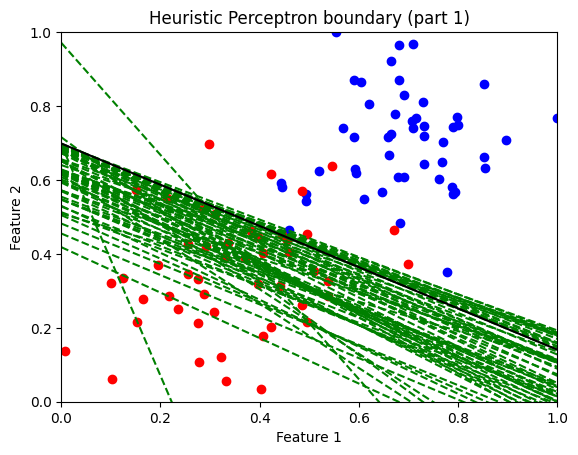

In [1]:
# Adam Ullmann
# 011215244

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load data
data = pd.read_csv('data.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

learning_rate = 0.1  	# play
iterations = 65  	# play

weights = np.random.rand(2)
bias = np.random.rand()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(0, 1)
plt.ylim(0, 1)
def plot_boundary(weights, bias, color, linestyle='-'):
    x_values = np.array([0, 1])
    y_values = -(weights[0] * x_values + bias) / weights[1]
    plt.plot(x_values, y_values, color=color, linestyle=linestyle)
plot_boundary(weights, bias, color='red')
for i in range(iterations):
    for xi, target in zip(X, y):
        activation = np.dot(weights, xi) + bias
        if activation >= 0:
            prediction = 1 
        else: 
            prediction = 0
        if prediction != target:
            if prediction == 0 and target == 1:
                bias += learning_rate
                weights += learning_rate * xi
            elif prediction == 1 and target == 0:
                bias -= learning_rate
                weights -= learning_rate * xi
    plot_boundary(weights, bias, color='green', linestyle='dashed')
plot_boundary(weights, bias, color='black', linestyle='solid')
plt.title('Heuristic Perceptron boundary (part 1)')
#plt.savefig('part1.png')
plt.show()


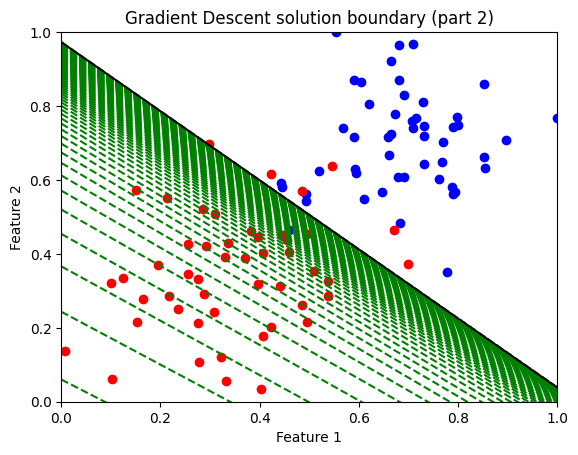

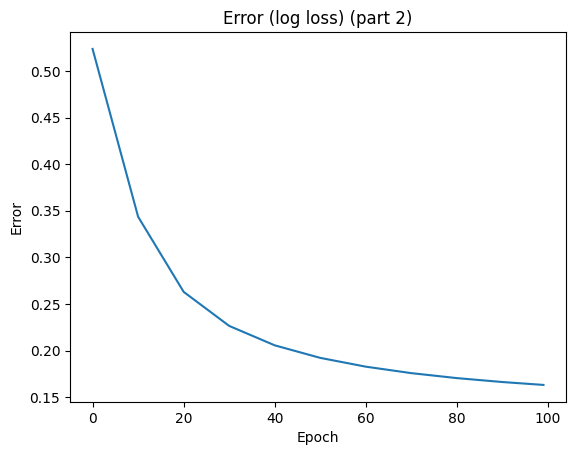

In [2]:
# Adam Ullmann
# 011215244

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# load data
data = pd.read_csv('data.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

learning_rate = 0.08  	# play
epochs = 100  		# play

weights = np.random.rand(2)
bias = np.random.rand()
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(0, 1)
plt.ylim(0, 1)
def plot_boundary(weights, bias, color, linestyle='-'):
    x_values = np.array([0, 1])
    y_values = -(weights[0] * x_values + bias) / weights[1]
    plt.plot(x_values, y_values, color=color, linestyle=linestyle)

plot_boundary(weights, bias, color='red')

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

log_losses = []
epoch_indices = []

for epoch in range(epochs):
    total_loss = 0
    for xi, target in zip(X, y):
        activation = np.dot(weights, xi) + bias
        y_pred = sigmoid(activation)
        error = target - y_pred
        bias += learning_rate * error
        weights += learning_rate * error * xi
        total_loss += - (target * np.log(y_pred) + (1 - target) * np.log(1 - y_pred))
    if epoch % 10 == 0 or epoch == 99:
        log_losses.append(total_loss / len(y))
        epoch_indices.append(epoch)
    plot_boundary(weights, bias, color='green', linestyle='dashed')
plot_boundary(weights, bias, color='black', linestyle='solid')
plt.title('Gradient Descent solution boundary (part 2)')
plt.savefig('part2_gradient_descent.png')
#plt.show()

plt.figure()
plt.plot(epoch_indices, log_losses, label='Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error (log loss) (part 2)')
#plt.savefig('part2_error.png')
plt.show()

